In [1]:
# % matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def ellipsoid_quantile(data, quantile):
    assert 0 < quantile < 1
    # data is np.martix, shape: (n_samples, n_dimensions)
    
    plt.figure(figsize=(17, 10))

    plt.scatter(data[:,0], data[:,1])

    cov = np.cov(np.transpose(data))  # dobrze?
    miu = (np.mean(data[:,0]), np.mean(data[:,1]) )
#     print 'cov:\n', cov
#     print 'miu:', miu
    plt.scatter(miu[0], miu[1], c='red')

    eig_vals, eig_vects =  np.linalg.eig(cov) # kazdy wektor w kolejnej kolumnie
    print 'eig_vals', eig_vals
#     print 'eig_vects:\n', eig_vects

    # alpha = -2 * np.log(0.9)
    # print 'alpha', alpha

    # chisquare_val = 2.4477 # is for 0.95
    theta_grid = np.linspace(0,2*np.pi, 300)
    # ellipse_x_r  = chisquare_val*np.sqrt(eig_vals[0])*np.cos( theta_grid )
    # ellipse_y_r  = chisquare_val*np.sqrt(eig_vals[1])*np.sin( theta_grid )

    # inserted wzorek od leśniaka
    con_inv = np.linalg.inv(cov)
    a, b = con_inv[0,:]
    c, d = con_inv[1,:]

    # leśniak 2 | przerzucamy dane do przestrzeni, gdzie elipsa jest kolem i liczymy kwantyl
    les2 = [np.dot(np.dot((row-miu).T, con_inv), (row-miu)) for row in data]
    les2 = sorted(les2)
    ind = np.floor(quantile*len(les2))

    # INSERTED WZOREK OD LESNIAKA DALSZA CZESC
    licznik = les2[int(ind)]
    mianownik = a*np.cos(theta_grid)*np.cos(theta_grid) + (b+c)*np.sin(theta_grid)*np.cos(theta_grid) + d*np.sin(theta_grid)*np.sin(theta_grid)
    lam = np.sqrt(licznik/mianownik)

    # wspolrzedne elipsy
    x = np.multiply(lam, np.cos(theta_grid))
    y = np.multiply(lam, np.sin(theta_grid))

    # angle = np.arctan2(eig_vects[1,0], eig_vects[0,0])
    # if(angle < 0):
    #     angle = angle + 2*np.pi

    # R = np.array([[ np.cos(angle), np.sin(angle)], [-np.sin(angle), np. cos(angle)] ])
    # r_ellipse = np.dot(np.vstack((ellipse_x_r, ellipse_y_r)).T, R)

    plt.plot(x+miu[0], y+miu[1], c='green')
    # plt.plot(r_ellipse[:,0]+miu[0], r_ellipse[:,1]+miu[1], c='green')
    plt.show()
    print 'cov:\n', cov
    print 'miu:', miu
    print 'eig_vects:\n', eig_vects
    print 'LAMBDA:?', licznik

In [48]:
def dummy_ellipse(data, q):
    assert 0 < quantile < 1
    # data is np.martix, shape: (n_samples, n_dimensions)
    
    plt.figure(figsize=(17, 10))

    plt.scatter(data[:,0], data[:,1])

    cov = np.cov(np.transpose(data))  # dobrze?
    miu = (np.mean(data[:,0]), np.mean(data[:,1]) )
#     print 'cov:\n', cov
#     print 'miu:', miu
    plt.scatter(miu[0], miu[1], c='red')

    eig_vals, eig_vects =  np.linalg.eig(cov) # kazdy wektor w kolejnej kolumnie
    print 'eig_vals', eig_vals

eig_vals [ 61.19812198  18.60187802]


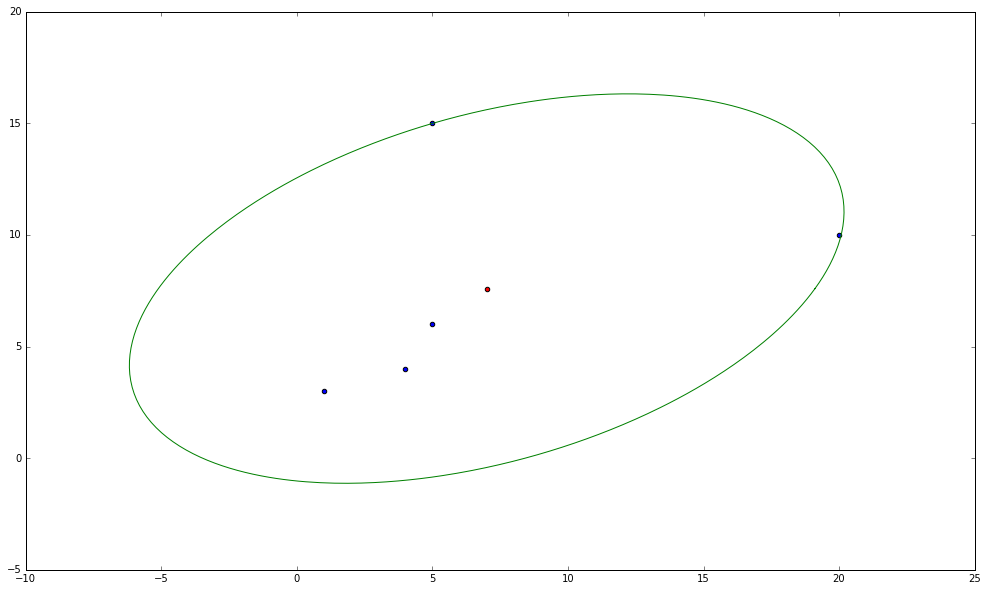

cov:
[[ 55.5  14.5]
 [ 14.5  24.3]]
miu: (7.0, 7.5999999999999996)
eig_vects:
[[ 0.9307145  -0.36574653]
 [ 0.36574653  0.9307145 ]]
LAMBDA:? 3.13209768096


In [49]:
data = np.array([(1, 3), (4, 4), (5, 6), (5, 15), (20, 10)])
ellipsoid_quantile(data, 0.95)

eig_vals [ 2.  0.]


LinAlgError: Singular matrix

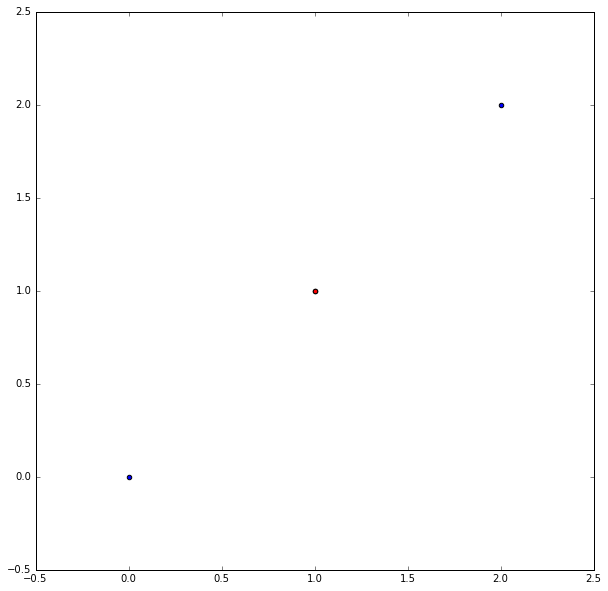

In [12]:
data = np.array([(1, 1), (0, 0), (2, 2)])
ellipsoid_quantile(data, 0.9)

eig_vals [ 0.66666667  0.66666667]


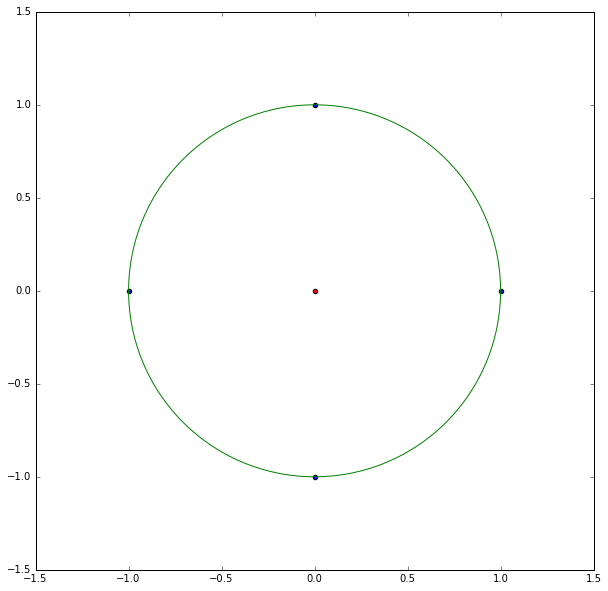

cov:
[[ 0.66666667  0.        ]
 [ 0.          0.66666667]]
miu: (0.0, 0.0)
eig_vects:
[[ 1.  0.]
 [ 0.  1.]]
LAMBDA:? 1.5
eig_vals [ 0.66666667  0.66666667]


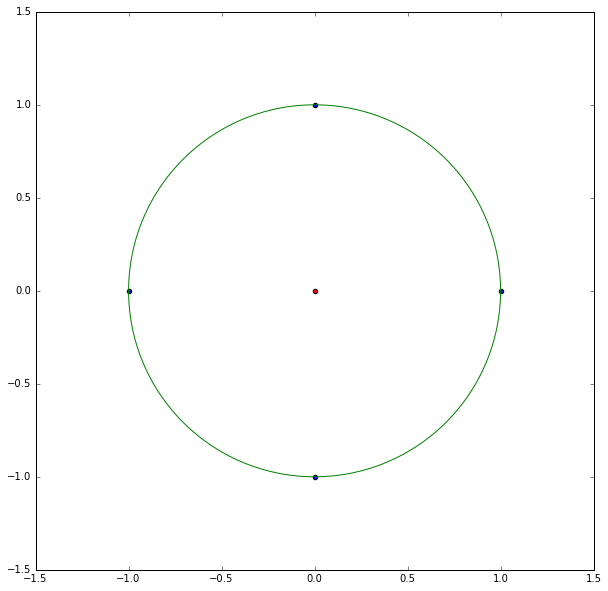

cov:
[[ 0.66666667  0.        ]
 [ 0.          0.66666667]]
miu: (0.0, 0.0)
eig_vects:
[[ 1.  0.]
 [ 0.  1.]]
LAMBDA:? 1.5
eig_vals [ 0.66666667  0.66666667]


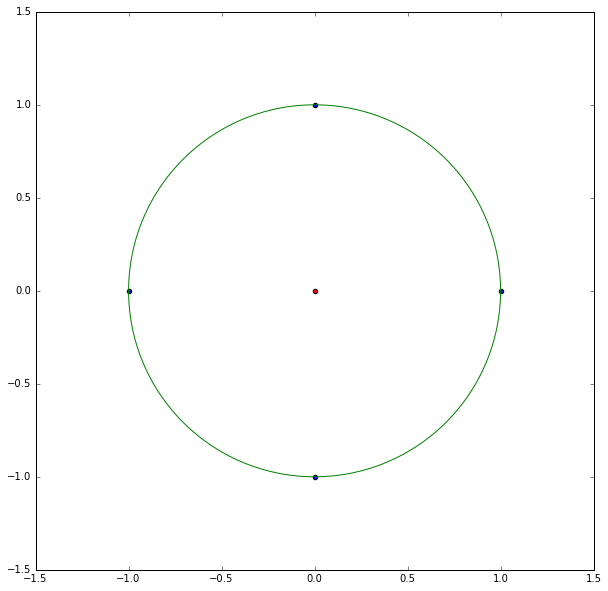

cov:
[[ 0.66666667  0.        ]
 [ 0.          0.66666667]]
miu: (0.0, 0.0)
eig_vects:
[[ 1.  0.]
 [ 0.  1.]]
LAMBDA:? 1.5


In [13]:
data = np.array([(0, -1), (-1, 0), (0, 1), (1, 0)])
ellipsoid_quantile(data, 0.9)
ellipsoid_quantile(data, 0.8)
ellipsoid_quantile(data, 0.75)

eig_vals [ 21.40162753   7.79480104]


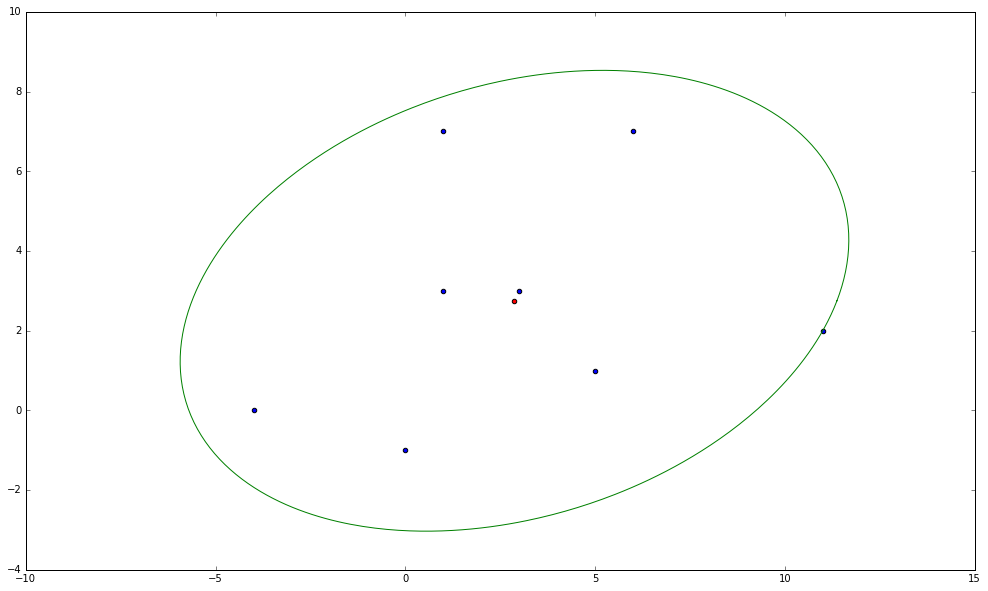

cov:
[[ 20.41071429   3.53571429]
 [  3.53571429   8.78571429]]
miu: (2.875, 2.75)
eig_vects:
[[ 0.96289942 -0.26986054]
 [ 0.26986054  0.96289942]]
LAMBDA:? 3.80386962107
eig_vals [ 21.40162753   7.79480104]


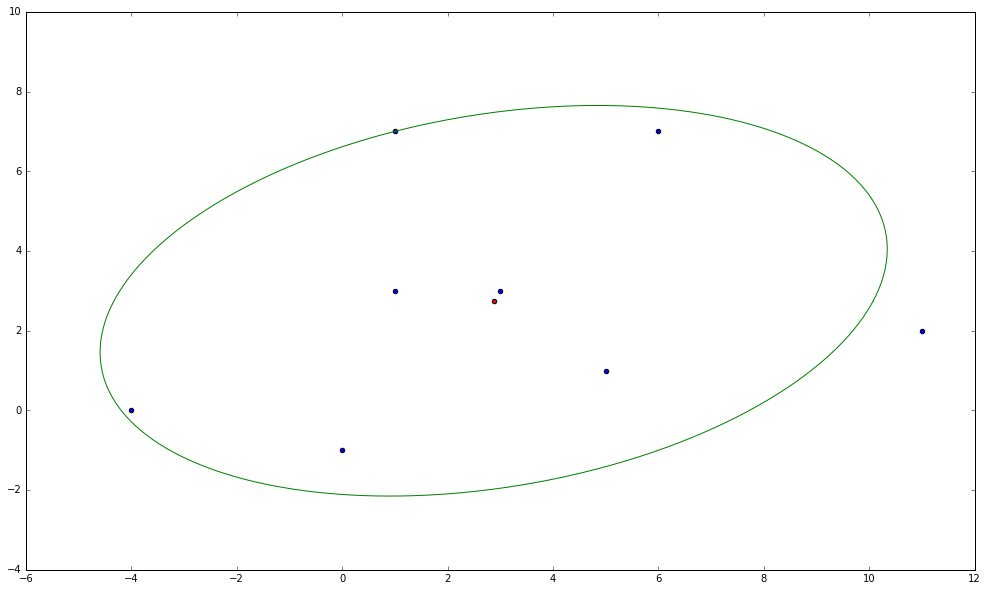

cov:
[[ 20.41071429   3.53571429]
 [  3.53571429   8.78571429]]
miu: (2.875, 2.75)
eig_vects:
[[ 0.96289942 -0.26986054]
 [ 0.26986054  0.96289942]]
LAMBDA:? 2.73289980732


In [51]:
data = np.array([(0, -1), (1, 3), (-4, 0), (5, 1), (6, 7), (11, 2), (3, 3), (1, 7)])
ellipsoid_quantile(data, 0.9)
ellipsoid_quantile(data, 0.8)

ValueError: invalid number of arguments

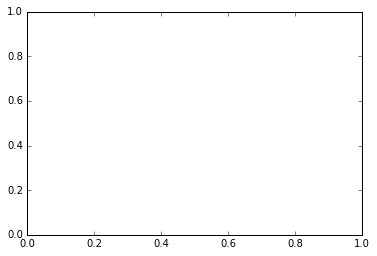

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

nstd = 2

def stack(data, q):
    ax = plt.subplot(111)

    cov = np.cov(data)
    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=np.mean(data),
                  width=w, height=h,
                  angle=theta, color='black')
    ell.set_facecolor('none')
    ax.add_artist(ell)
    plt.scatter(x, y)
    plt.show()
    
data = np.array([(0, -1), (1, 3), (-4, 0), (5, 1), (6, 7), (11, 2), (3, 3), (1, 7)])
stack(data, 0.9)

In [43]:
def ellipsoid_quantile(data, quantile):
    assert 0 < quantile < 1
    # data is np.martix, shape: (n_samples, n_dimensions)
    plt.figure(figsize=(9, 5))
    plt.scatter(data[:,0], data[:,1])

    cov = np.cov(np.transpose(data))  # dobrze?
    miu = (np.mean(data[:,0]), np.mean(data[:,1]) )

    plt.scatter(miu[0], miu[1], c='red')

    eig_vals, eig_vects =  np.linalg.eig(cov) # kazdy wektor w kolejnej kolumnie
    print 'eig_vals', eig_vals

    chisquare_val = 2.4477 # is for 0.95
    theta_grid = np.linspace(0,2*np.pi, 300)
    ellipse_x_r  = chisquare_val*np.sqrt(eig_vals[0])*np.cos( theta_grid )
    ellipse_y_r  = chisquare_val*np.sqrt(eig_vals[1])*np.sin( theta_grid )

    angle = np.arctan2(eig_vects[1,0], eig_vects[0,0])
    if(angle < 0):
        angle = angle + 2*np.pi

    R = np.array([[ np.cos(angle), np.sin(angle)], [-np.sin(angle), np. cos(angle)] ])
    r_ellipse = np.dot(np.vstack((ellipse_x_r, ellipse_y_r)).T, R)

    plt.plot(r_ellipse[:,0]+miu[0], r_ellipse[:,1]+miu[1], c='green')
    plt.show()
    print 'cov:\n', cov
    print 'miu:', miu
    print 'eig_vects:\n', eig_vects
    print 'LAMBDA:?', licznik

eig_vals [ 21.40162753   7.79480104]


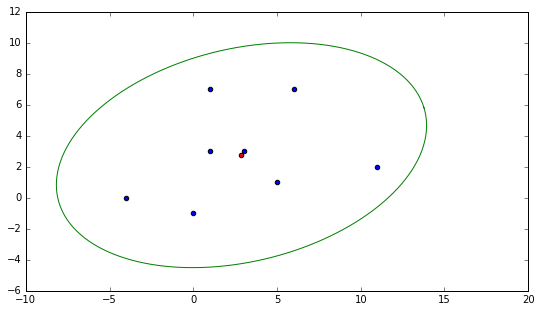

cov:
[[ 20.41071429   3.53571429]
 [  3.53571429   8.78571429]]
miu: (2.875, 2.75)
eig_vects:
[[ 0.96289942 -0.26986054]
 [ 0.26986054  0.96289942]]
LAMBDA:?

NameError: global name 'licznik' is not defined

In [44]:
data = np.array([(0, -1), (1, 3), (-4, 0), (5, 1), (6, 7), (11, 2), (3, 3), (1, 7)])
ellipsoid_quantile(data, 0.9)

In [6]:
data = np.array([(0, -1), (-1, 0), (0, 1), (1, 0)])
q = 0.9

cov = np.cov(data.T)
inv_cov = np.linalg.inv(cov)
mean = np.mean(data)

# to juz sa nasze odleglosci
circled_data = sorted([np.dot(np.dot((row-mean).T, inv_cov), (row-mean)) for row in data])
# circled_data = [1.5,1.5,1.5,1.5,2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 2.3, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7]

n = len(circled_data)

from collections import Counter
n_at_distance = Counter(circled_data)

qlevel = [0]
for distance in reversed(sorted(n_at_distance.keys())):
    qlevel.append(qlevel[-1]+n_at_distance[distance])

qlevel = [(n-float(i))/n for i in qlevel]

# qlevel = [0.0, 0.2, 0.4, 0.7, 1.]
qlevel = qlevel[1:-1]

qlevel = np.array(qlevel)
index_outer = qlevel[qlevel>q].shape[0]+1
index_inner = index_outer+1
print 'outer:', index_outer

qlevel = [1] + list(qlevel)
distances = list(reversed(sorted(set(circled_data))))
print 'distances', distances
qo = qlevel[index_outer-1]
do = distances[index_outer-1]


if index_outer == len(distances):
    qi, di = 0, 0
else:
    qi = qlevel[index_inner-1]
    di = distances[index_inner-1]


print 'do', do, 'qi', qi, 'di',di, 'qo', qo

wazna_rzecz = di + (do-di)*((q-qi)/(qo-qi))
wazna_rzecz = wazna_rzecz**2
print 'wazna_rzecz', wazna_rzecz

nowa_kowariancja =  wazna_rzecz * cov
print 'stara kowariancja\n', cov
print 'nowa_kowariancja\n', nowa_kowariancja

# ========================

vals, vects = np.linalg.eig(nowa_kowariancja)
radii = np.sqrt(vals)

print radii

outer: 1
distances [1.5]
do 1.5 qi 0 di 0 qo 1
wazna_rzecz 1.8225
stara kowariancja
[[ 0.66666667  0.        ]
 [ 0.          0.66666667]]
nowa_kowariancja
[[ 1.215  0.   ]
 [ 0.     1.215]]
[ 1.10227038  1.10227038]


In [95]:
print qo

0.4
